In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv("C:/Users/hp/Desktop/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [7]:
print('Glucose',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin',len(data['Insulin'][data['Insulin']==0]))

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374


In [8]:
data['BMI']=data['BMI'].replace([0],data['BMI'].mean())

In [9]:
col=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
null=(data[col]==0).mean()*100
print("percent of all null values");
print(null)



percent of all null values
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               0.000000
dtype: float64


In [10]:
data['Glucose']=data['Glucose'].replace([0],data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace([0],data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace([0],data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace([0],data['Insulin'].mean())

In [11]:
null_treat=(data[col]==0).mean()*100
print("persent of null values for each colmn after the null values treament ")
print(null_treat)

persent of null values for each colmn after the null values treament 
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


In [12]:
column=data[col]


In [13]:
type(column)

pandas.core.frame.DataFrame

In [14]:
column.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

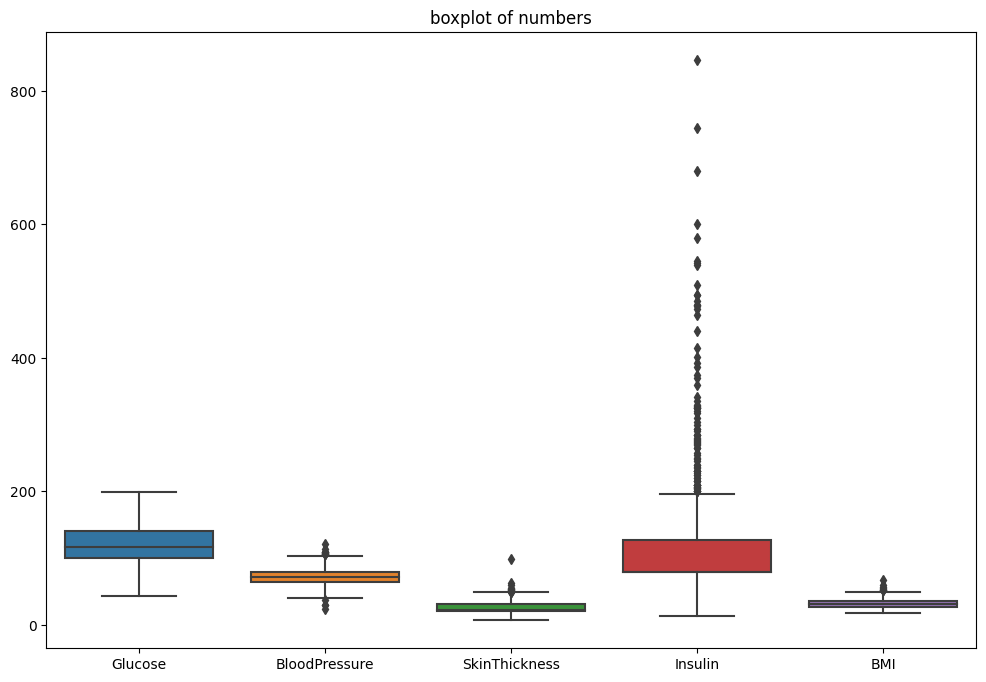

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data=column)
plt.title("boxplot of numbers")
plt.show()


In [16]:
def find_outliers(data,column_name):
    Q1=data[column_name].quantile(0.25)
    Q3=data[column_name].quantile(0.75)
    
    
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    outliers=data[(data[column_name]<lower_bound ) | (data[column_name]>upper_bound)]
    
    count_outliers=len(outliers)
    return count_outliers


for column_name in col:
    outlier_count=find_outliers(data,column_name)
    print(f"number of outliers {column_name} , column{outlier_count}")
    
    

number of outliers Glucose , column0
number of outliers BloodPressure , column14
number of outliers SkinThickness , column12
number of outliers Insulin , column89
number of outliers BMI , column8


In [17]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [18]:
data_clear_iqr=data[~((data < (Q1-1.5*IQR)) | (data >(Q3+1.5*IQR ))).any(axis=1)]
data_clear_iqr
print(data_clear_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [19]:
data_clear_iqr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
col1=data_clear_iqr[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]

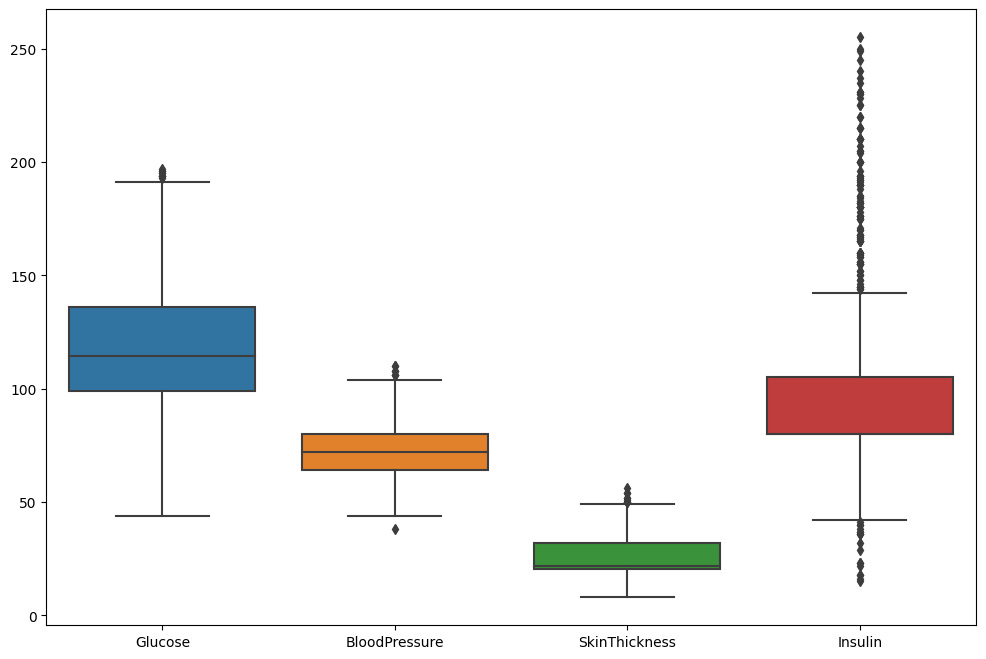

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(data=col1)
plt.show()

# EDA  - univariate analysis for each feature

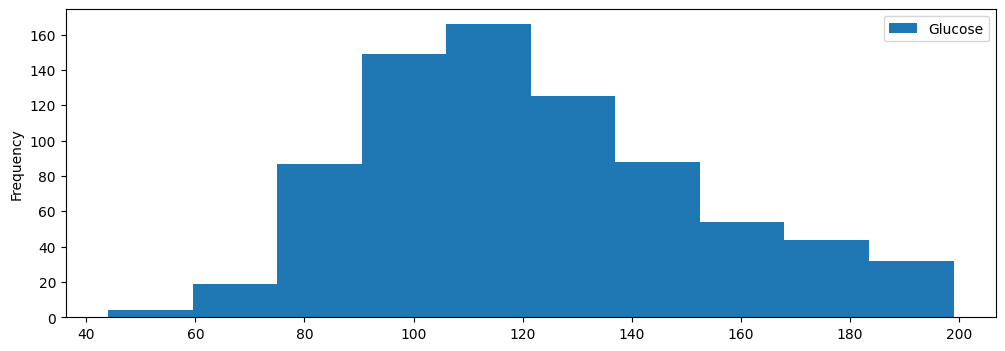

In [22]:
data["Glucose"].plot(kind='hist', figsize=(12,4))
plt.legend()
plt.show()

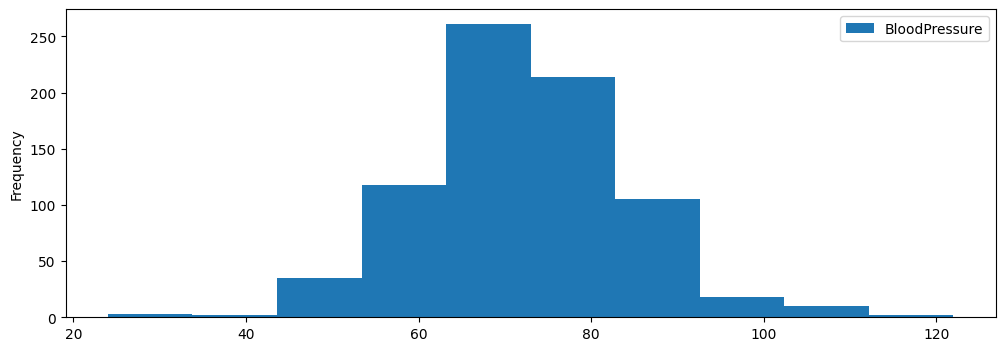

In [23]:
data["BloodPressure"].plot(kind='hist', figsize=(12,4))
plt.legend()
plt.show()

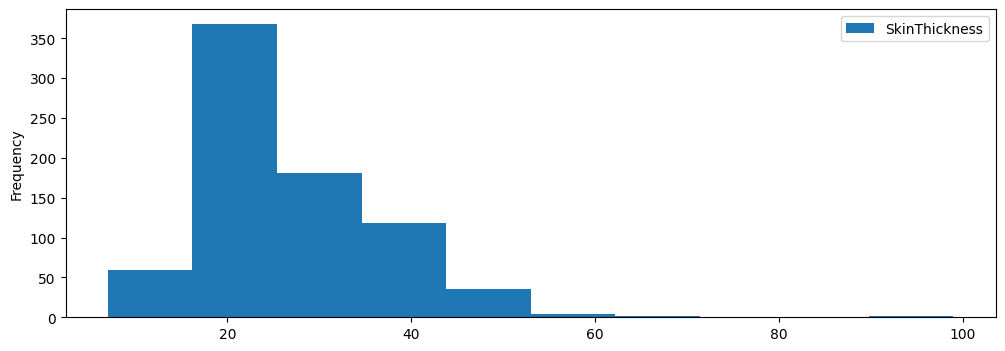

In [24]:
data["SkinThickness"].plot(kind='hist', figsize=(12,4))
plt.legend()
plt.show()

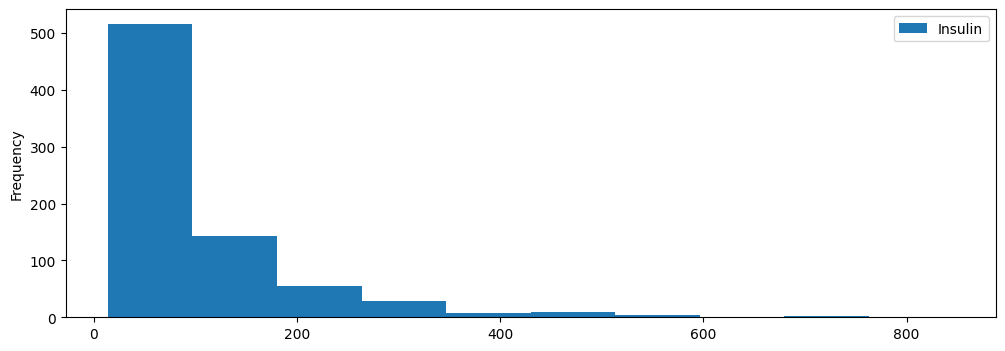

In [25]:
data["Insulin"].plot(kind='hist', figsize=(12,4))
plt.legend()
plt.show()

# vilon plot for selected columns

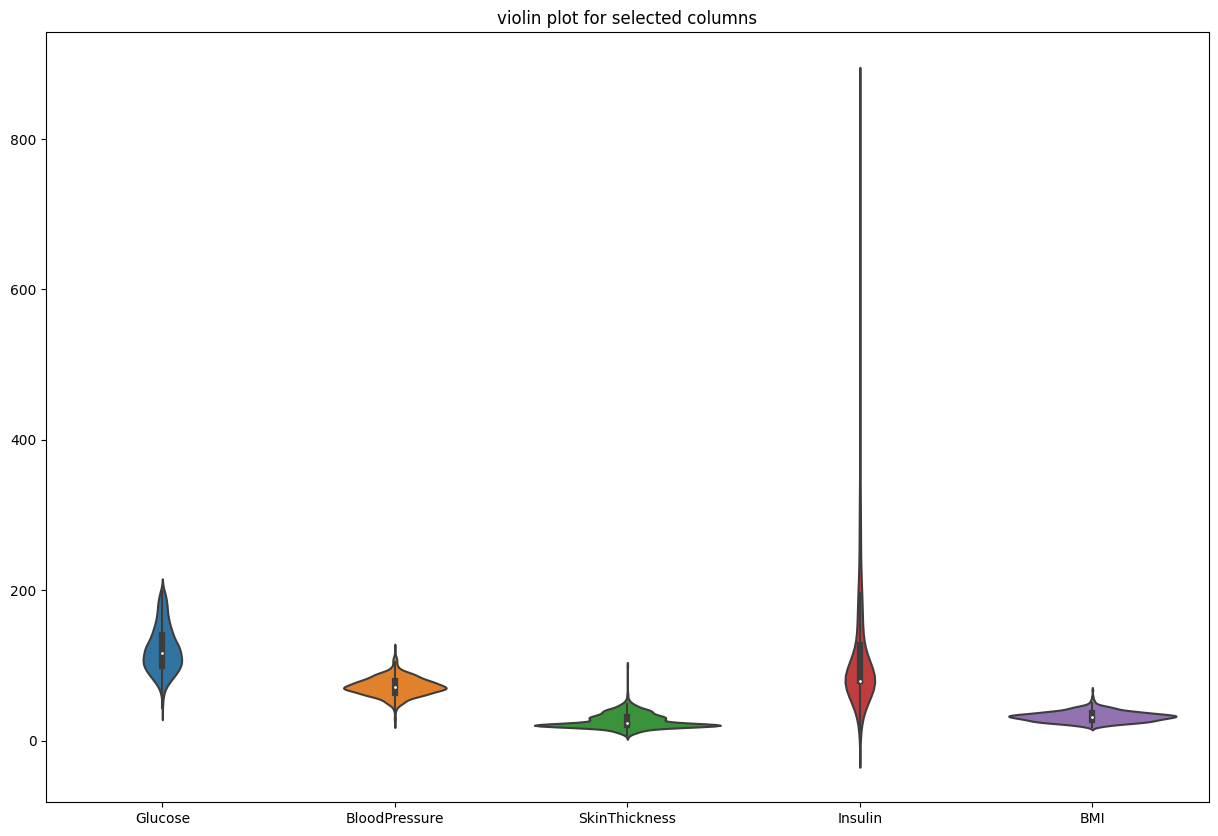

In [26]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data[col])
plt.title("violin plot for selected columns")
plt.show()

# kernal Density Estimation plot for selected feature

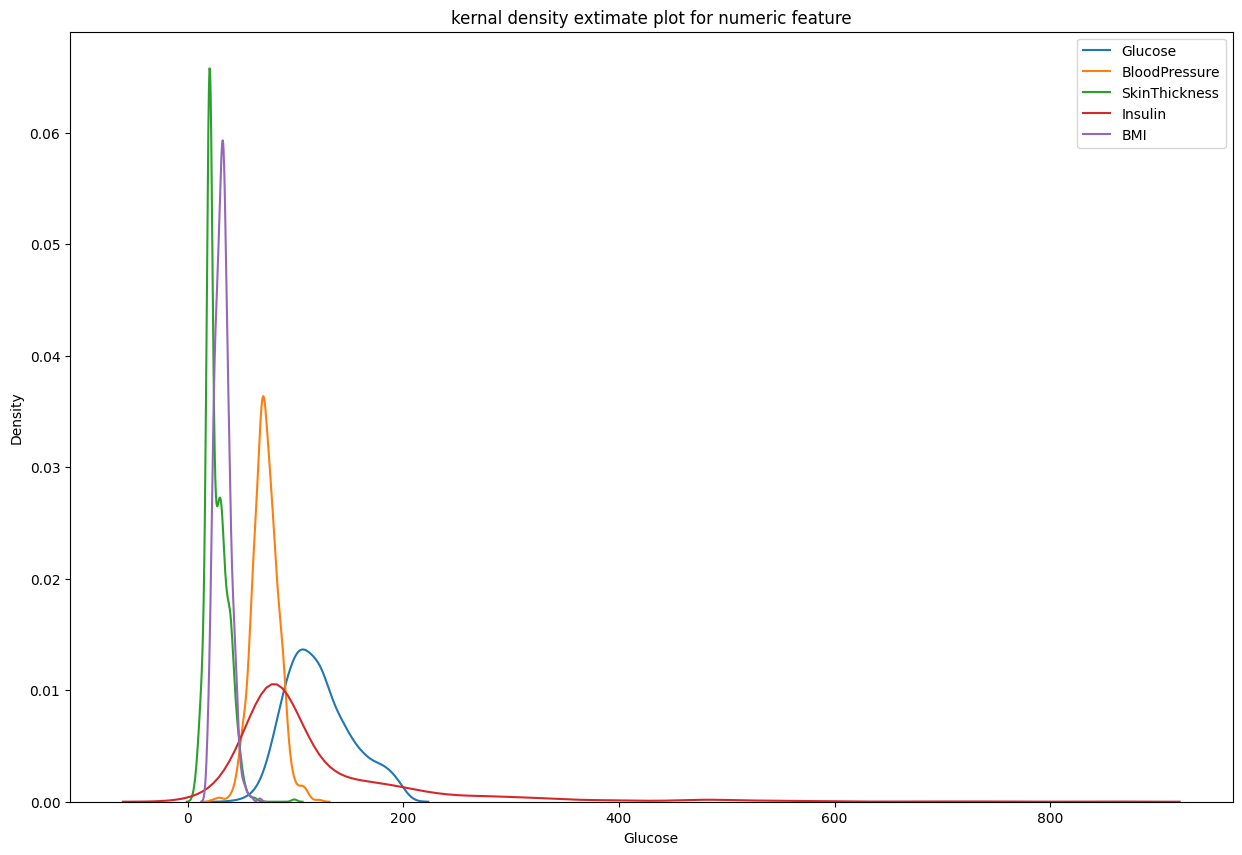

In [27]:
plt.figure(figsize=(15,10))
for column in col:
    sns.kdeplot(data=data[column], label=column)
plt.title("kernal density extimate plot for numeric feature")
plt.legend()
plt.show()

# creating a count plot describing the data and count of variable

In [28]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
data.dtypes.value_counts()

float64    6
int64      3
Name: count, dtype: int64

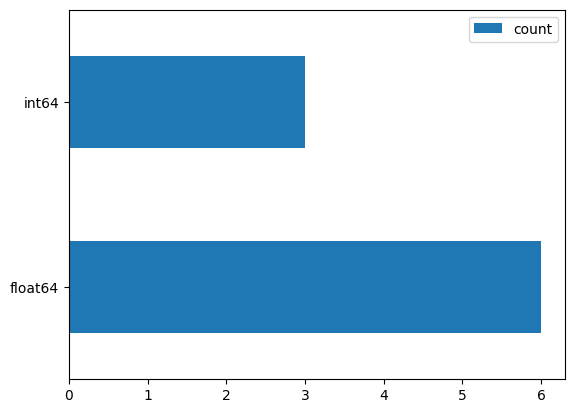

In [30]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

# data exploration:

In [31]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

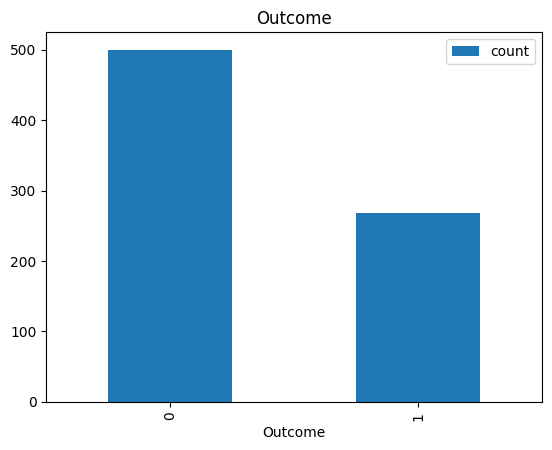

In [32]:
data['Outcome'].value_counts().plot(kind='bar')
plt.title("Outcome")
plt.legend()
plt.show()

In [33]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

# inference from outlier distribution

In [34]:
balanced_data=100-outcome
balanced_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

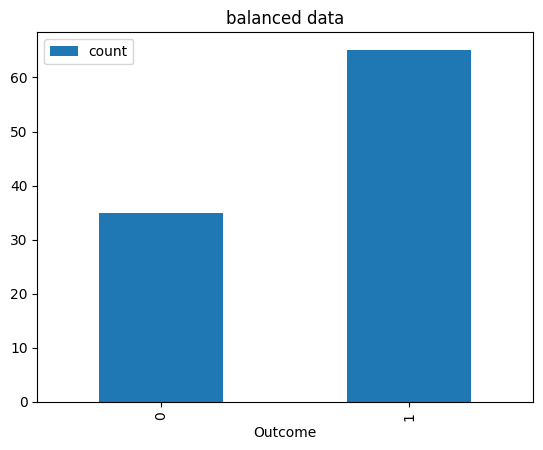

In [35]:
balanced_data.plot(kind = 'bar')
plt.title("balanced data")
plt.legend()
plt.show()


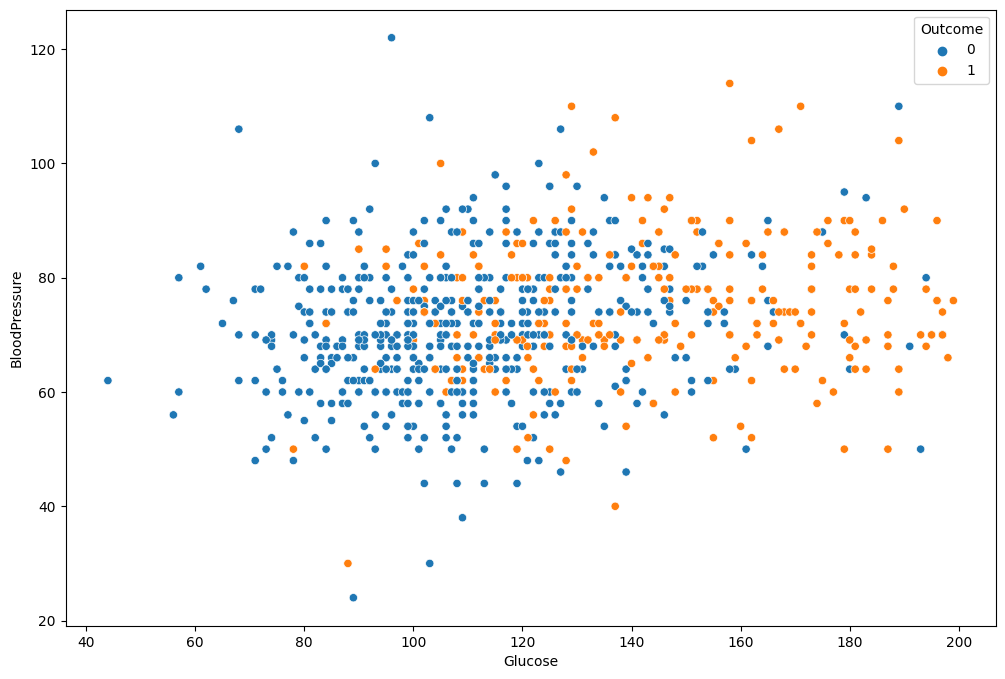

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Glucose",y="BloodPressure" ,hue="Outcome" , data=data)
plt.show()

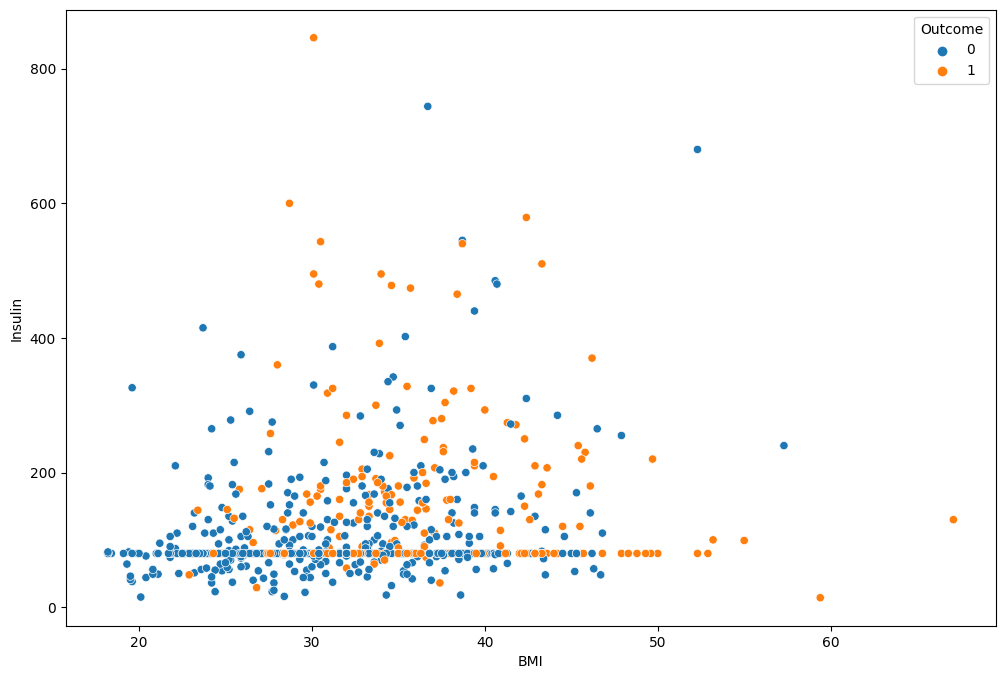

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="BMI",y="Insulin" ,hue="Outcome" , data=data)
plt.show()

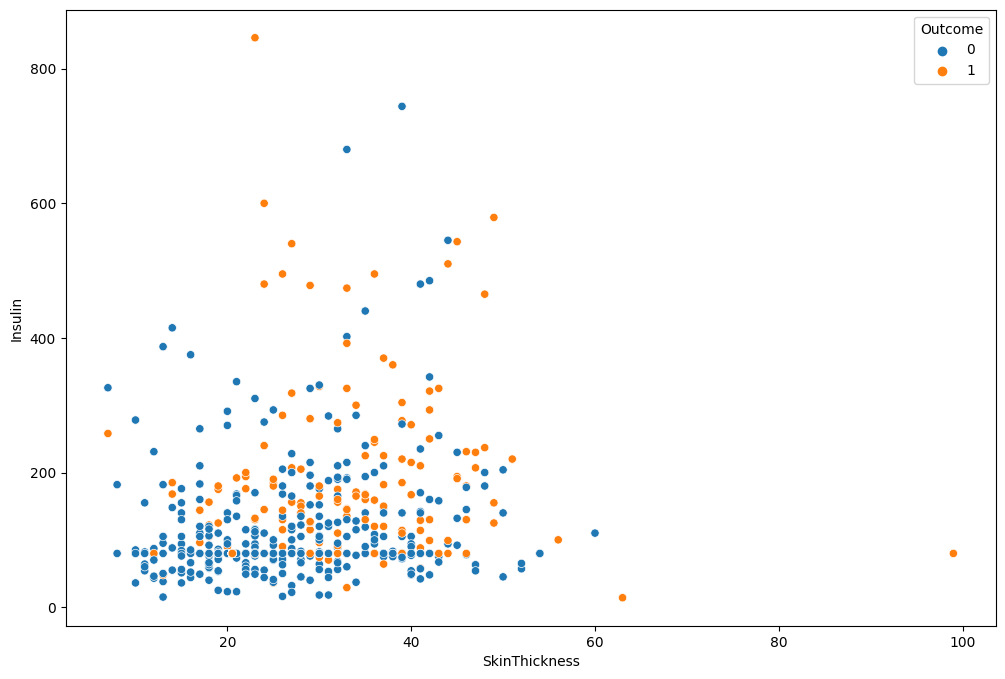

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="SkinThickness",y="Insulin" ,hue="Outcome" , data=data)
plt.show()

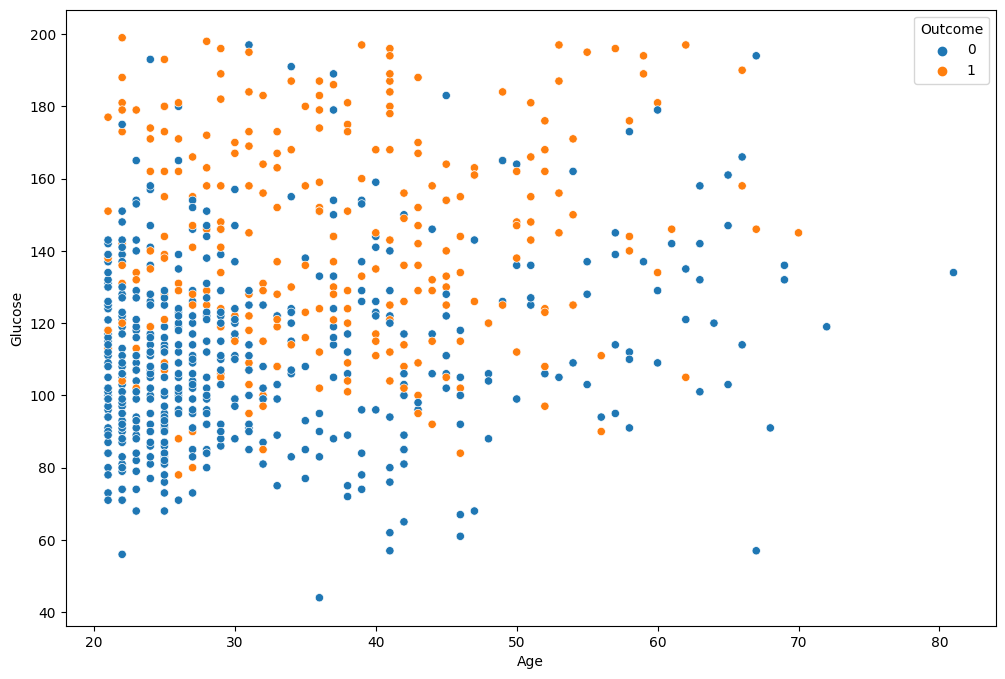

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Age",y="Glucose",hue="Outcome" , data=data)
plt.show()

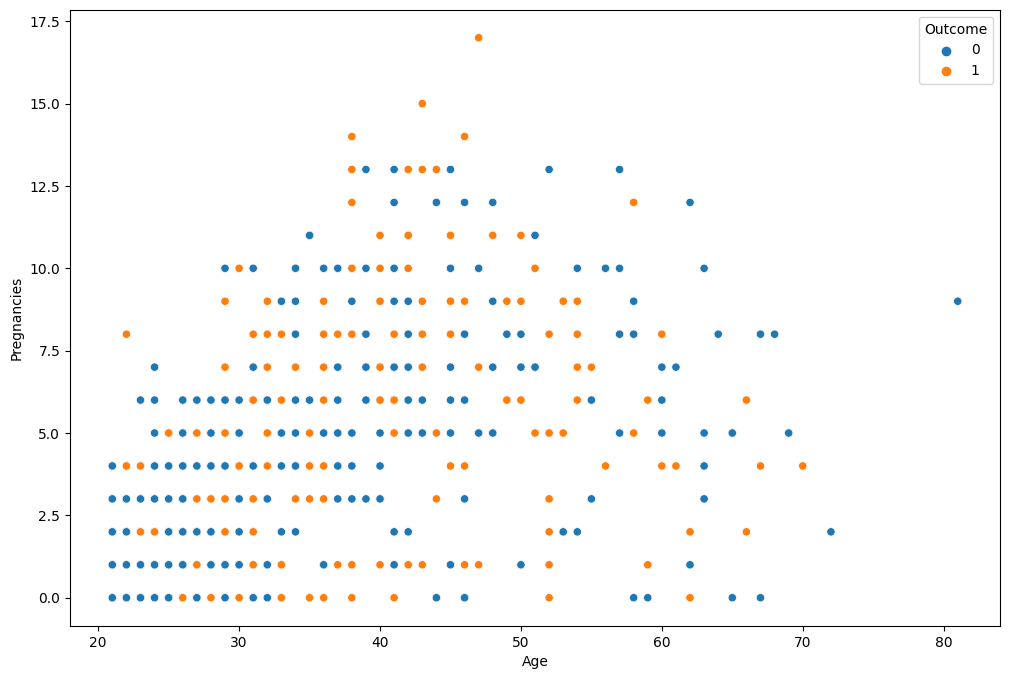

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Age",y="Pregnancies" ,hue="Outcome" , data=data)
plt.show()

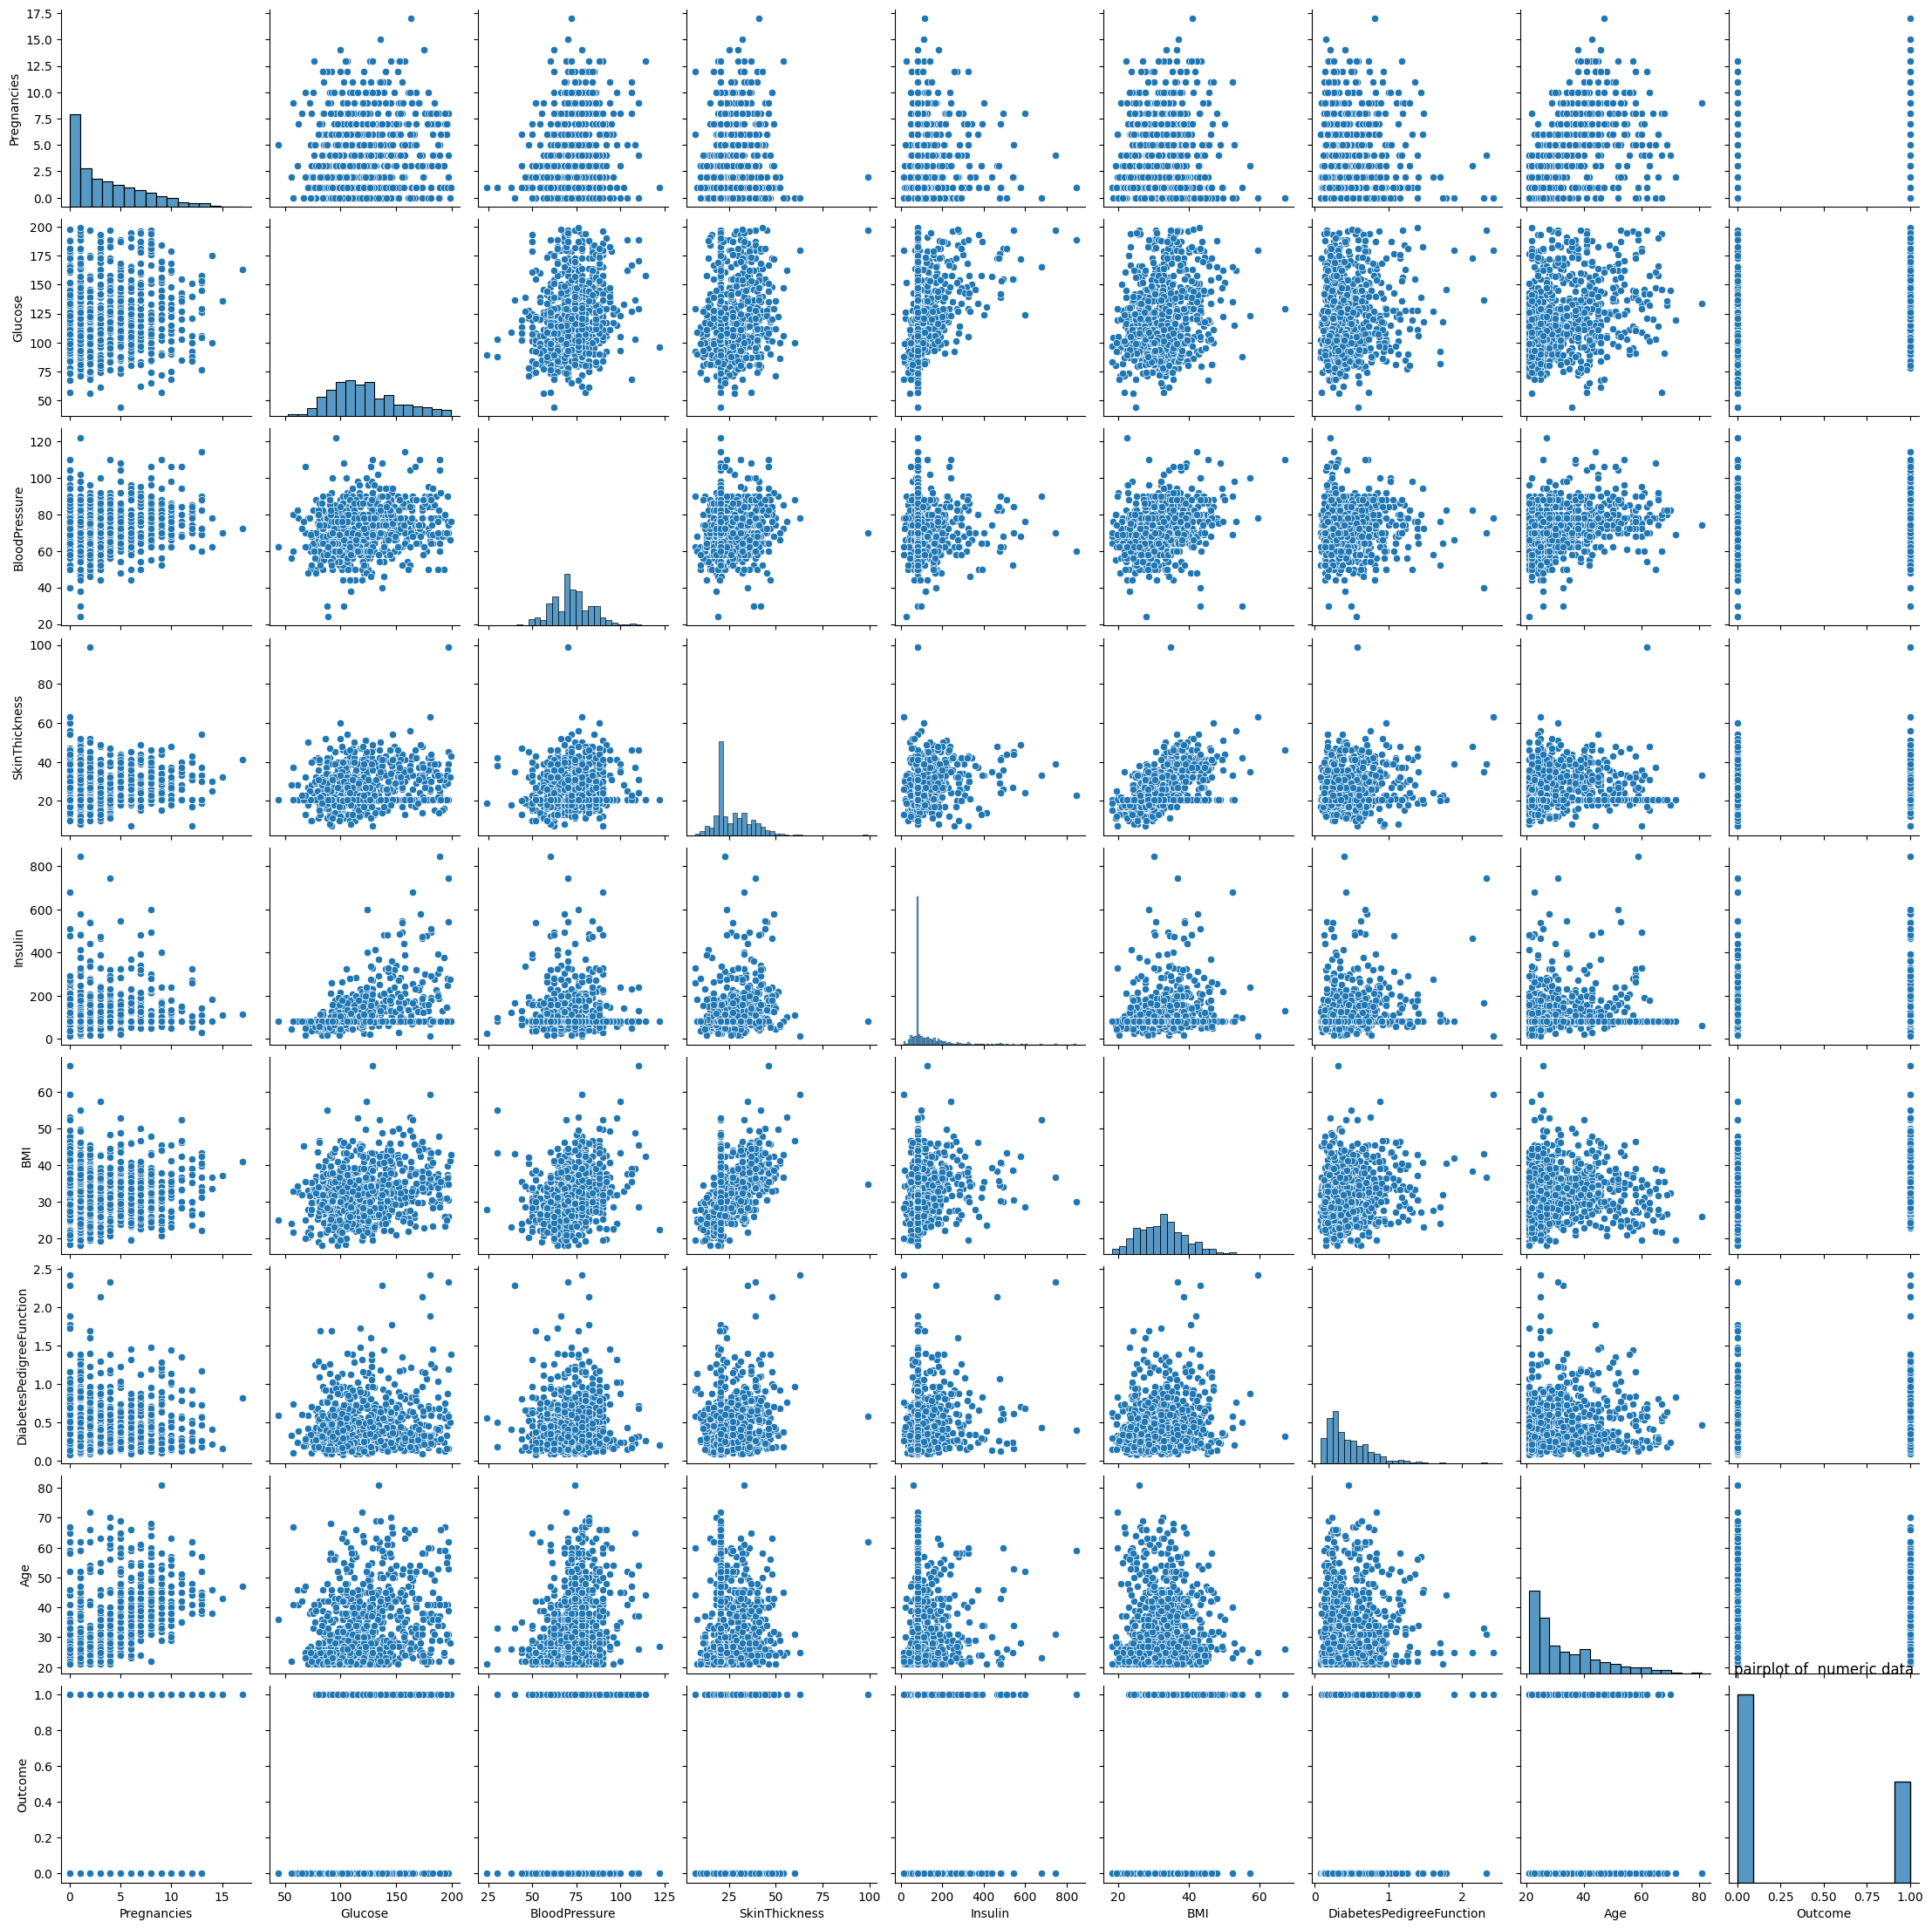

In [42]:
sns.pairplot(data)
plt.title("pairplot of  numeric data" , y=1.02)
plt.show()

# multivariate analysis:

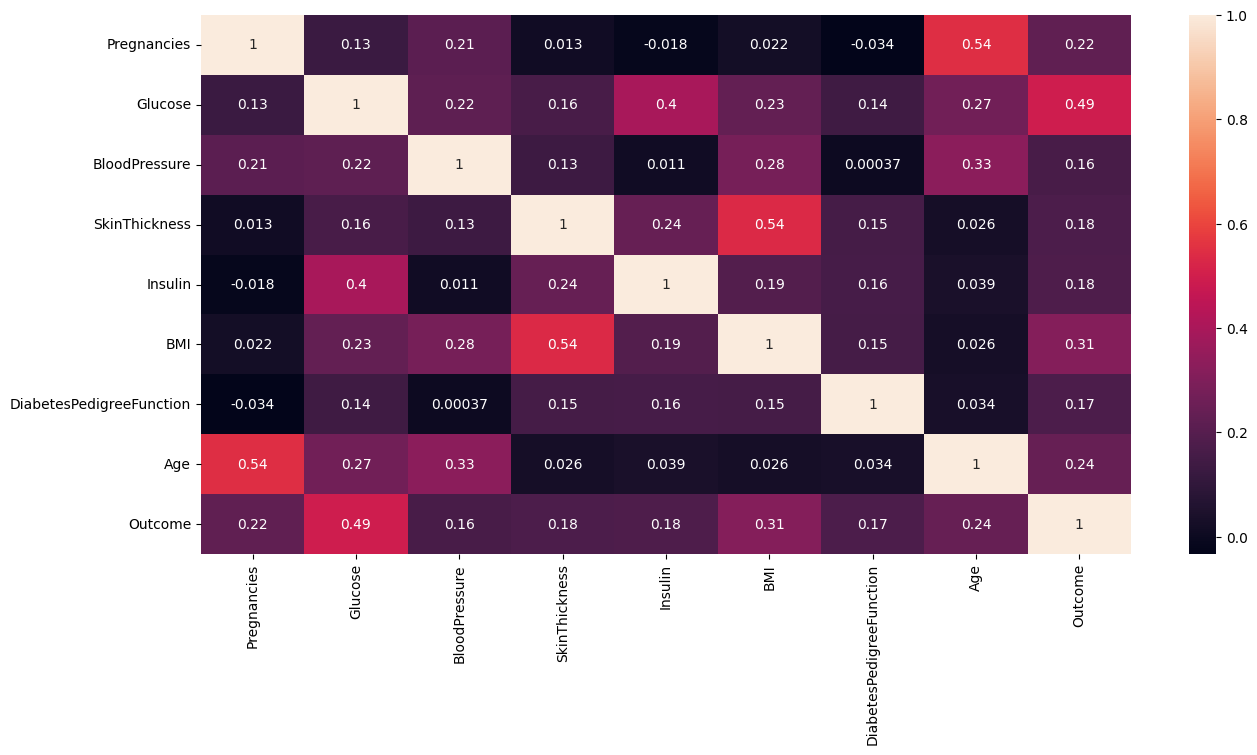

In [44]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Feature Scaling


In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [46]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [47]:
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [48]:
from sklearn.feature_selection import SelectKBest , chi2 
bestfeature=SelectKBest(score_func=chi2,k='all')
fit=bestfeature.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(8,'Score'))

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


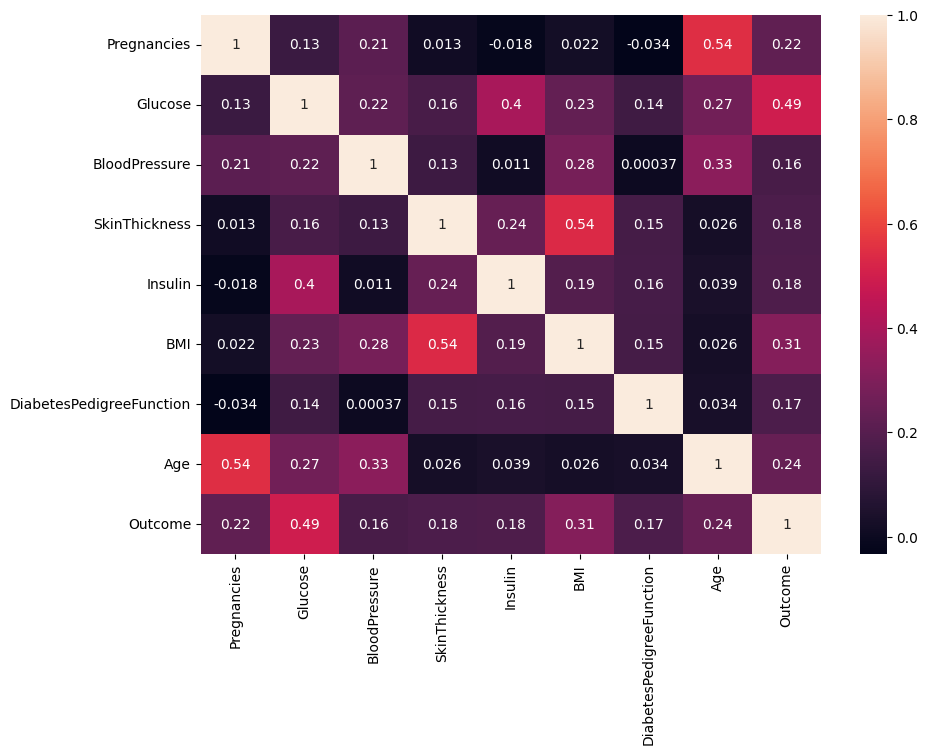

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot= True)
plt.show()

# SMOTE TO adress the class imbalance

train a model

In [50]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data['Outcome'].values

In [51]:
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.2,random_state=10)

In [52]:
print("Before oversampling , counts of label'1' : {}".format(sum(trainy==1)))
print("Before oversampling , counts of label'0' : {} \n".format(sum(trainy==0)))


from imblearn.over_sampling import SMOTE
sa=SMOTE(random_state=63)
trainx_res,trainy_res=sa.fit_resample(trainx,trainy.ravel())
print("Afert oversampling ,the shape of train_y {}".format(trainx_res.shape))
print("Afert oversampling ,the shape of train_y {}".format(trainy_res.shape))


print("Afert oversampling ,the count of label '1' {}".format(sum(trainy_res==1)))
print("Afert oversampling ,the count of label '0' {}".format(sum(trainy_res==0)))




Before oversampling , counts of label'1' : 209
Before oversampling , counts of label'0' : 405 

Afert oversampling ,the shape of train_y (810, 7)
Afert oversampling ,the shape of train_y (810,)
Afert oversampling ,the count of label '1' 405
Afert oversampling ,the count of label '0' 405


# Applying an Appropriate classification algorithm to build a model

# MODEL 1: Building a Logistic Regression  model


In [53]:
logistic=LogisticRegression(solver='liblinear',random_state=123)


In [54]:
logistic.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [55]:
prediction=logistic.predict(testx)

In [56]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report
print("Accuracy score",accuracy_score(testy,prediction))
print("Mean square error",mean_squared_error(testy,prediction))

Accuracy score 0.7207792207792207
Mean square error 0.2792207792207792


In [57]:
print(confusion_matrix(testy,prediction))

[[69 26]
 [17 42]]


In [58]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC : 0.839


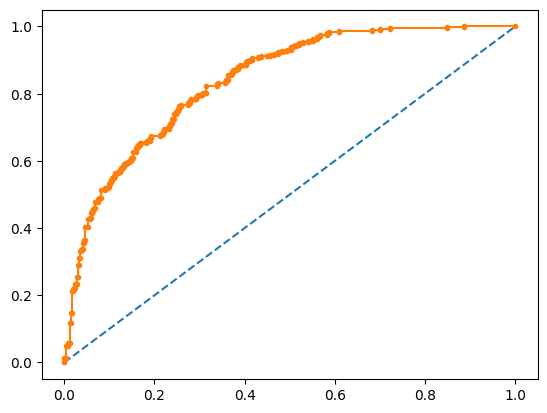

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

#predict probability
probs=logistic.predict_proba(trainx_res)

#keep probabilities for the positive outcomes only

probs=probs[:,1]

#calculate AUC
auc=roc_auc_score(trainy_res,probs)
print('AUC : %.3f' %auc)

#calculate roc curve
fpr, tpr, thresholds=roc_curve(trainy_res,probs)

#plot no skill
plt.plot([0,1],[0,1],linestyle='--')
#plot the roc curve for the model
plt.plot(fpr,tpr,marker='.')
plt.show()

# Model 2: RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,max_depth=5)

In [61]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [62]:
rf_prediction=rf.predict(testx)

In [63]:
print("Accuracy score",accuracy_score(testy,rf_prediction))
print('Means square error',mean_squared_error(testy,rf_prediction))


Accuracy score 0.7597402597402597
Means square error 0.24025974025974026


# RandomForestClassifier (Hyper Parameter Tunning)

In [64]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_sample_split':[2,4,3],'min_sample_leaf':[1,2,3],
            'max_sample_leaf':[2,4,3]}

In [65]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)


In [66]:
rf_grid=RandomForestClassifier(criterion='gini',max_depth=2,max_leaf_nodes=3,max_samples=4,min_samples_leaf=1,min_samples_split=3,
                               n_estimators=400,random_state=42)

In [67]:
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [68]:
rf_grid_pred=rf_grid.predict(testx)

In [69]:
print("Accuracy score",accuracy_score(testy,rf_grid_pred))
print("mean square score",mean_squared_error(testy,rf_grid_pred))

Accuracy score 0.7337662337662337
mean square score 0.2662337662337662


In [70]:
print(confusion_matrix(testy,prediction))


[[69 26]
 [17 42]]


In [71]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC : 0.939


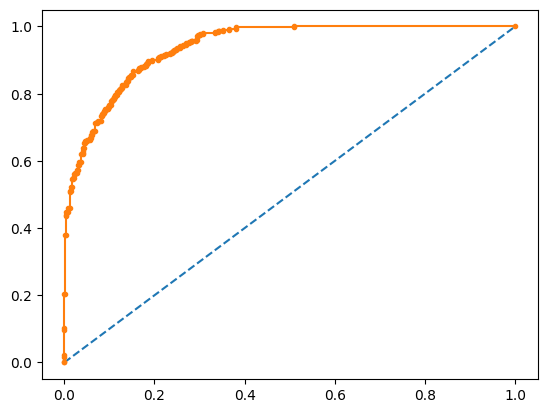

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

#predict probability
probs=rf.predict_proba(trainx_res)

#keep probabilities for the positive outcomes only

probs=probs[:,1]

#calculate AUC
auc=roc_auc_score(trainy_res,probs)
print('AUC : %.3f' %auc)

#calculate roc curve
fpr, tpr, thresholds=roc_curve(trainy_res,probs)

#plot no skill
plt.plot([0,1],[0,1],linestyle='--')
#plot the roc curve for the model
plt.plot(fpr,tpr,marker='.')
plt.show()

# Model 3: Decision TreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(random_state=42)

In [74]:
dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(random_state=42)

In [75]:
dc_pred=dc.predict(testx)

In [76]:
print("Accuracy score",accuracy_score(testy,dc_pred))
print("mean square score",mean_squared_error(testy,dc_pred))

Accuracy score 0.6233766233766234
mean square score 0.37662337662337664


# DecisionTreeClassifier(Hyper Parameter Tunning)

In [77]:
dc_aram_grid={'splitter':["best","random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],
            'max_leaf_nodes':[1,2,3]}

In [78]:
import warnings
warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_aram_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [79]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [80]:
dc_final=DecisionTreeClassifier(criterion='gini',max_depth=2,max_leaf_nodes=4,min_samples_leaf=1,
                                min_samples_split=2,splitter='best',random_state=42)

In [81]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [82]:
print("Accuracy score",accuracy_score(testy,dc_final_pred))
print("mean square score",mean_squared_error(testy,dc_final_pred))

Accuracy score 0.6883116883116883
mean square score 0.3116883116883117


In [83]:
print(confusion_matrix(testy,dc_final_pred))

[[73 22]
 [26 33]]


In [84]:
print(classification_report(testy,dc_final_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC : 0.792


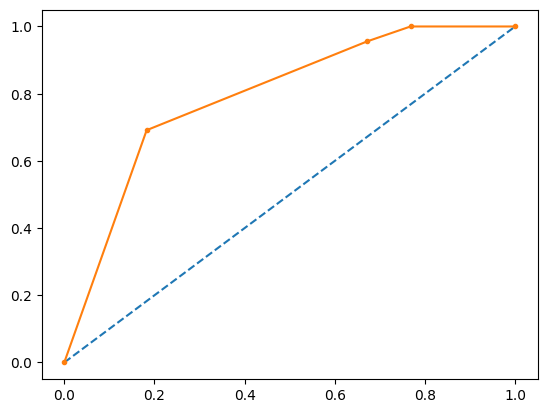

In [85]:
probs=dc_final.predict_proba(trainx_res)

#keep probabilities for the positive outcomes only

probs=probs[:,1]

#calculate AUC
auc=roc_auc_score(trainy_res,probs)
print('AUC : %.3f' %auc)

#calculate roc curve
fpr, tpr, thresholds=roc_curve(trainy_res,probs)

#plot no skill
plt.plot([0,1],[0,1],linestyle='--')
#plot the roc curve for the model
plt.plot(fpr,tpr,marker='.')
plt.show()

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)

In [87]:
knn.fit(trainx_res,trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [88]:
knn_pred=knn.predict(testx)

In [89]:
print("Accuracy score",accuracy_score(testy,knn_pred))
print("mean square score",mean_squared_error(testy,knn_pred))

Accuracy score 0.6233766233766234
mean square score 0.37662337662337664


In [90]:
print(confusion_matrix(testy,knn_pred))

[[68 27]
 [31 28]]


In [91]:
print(classification_report(testy,knn_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.51      0.47      0.49        59

    accuracy                           0.62       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.62      0.62      0.62       154



AUC : 0.951


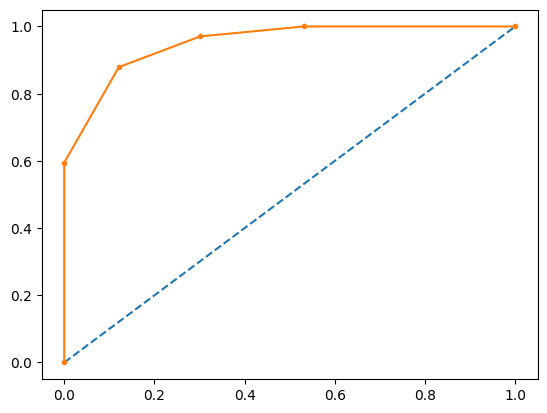

In [92]:
probs=knn.predict_proba(trainx_res)

#keep probabilities for the positive outcomes only

probs=probs[:,1]

#calculate AUC
auc=roc_auc_score(trainy_res,probs)
print('AUC : %.3f' %auc)

#calculate roc curve
fpr, tpr, thresholds=roc_curve(trainy_res,probs)

#plot no skill
plt.plot([0,1],[0,1],linestyle='--')
#plot the roc curve for the model
plt.plot(fpr,tpr,marker='.')
plt.show()

# Model Accuracy Comparison

In [93]:
Algorithms=['KNN','RandomForest','DecisionTree','logreg']
Accuracy_score=[accuracy_score(testy,knn_pred),accuracy_score(testy,rf_grid_pred),accuracy_score(testy,dc_final_pred),accuracy_score(testy,prediction)]

#create a dataframe
accuracy_df=pd.DataFrame({'Algorithm':Algorithms,"Accuracy":Accuracy_score})

#Display the accuracy table
print(accuracy_df)

      Algorithm  Accuracy
0           KNN  0.623377
1  RandomForest  0.733766
2  DecisionTree  0.688312
3        logreg  0.720779


# comparision of various model with the result from KNN

In [95]:
from sklearn.model_selection import cross_val_score
logreg_cv=LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
rf_cv=RandomForestClassifier(random_state=123)
cv_dict={0:'Logistic Regression',1:"Decision Tree",2:"KNN",3:"Random Forest"}
cv_models=[logreg_cv,dt_cv,knn_cv,rf_cv]

for i, model in enumerate(cv_models):
    print("{} test Accuracy: {}".format(cv_dict[i],cross_val_score(model,trainx,trainy,cv=10,scoring='accuracy').mean()))

Logistic Regression test Accuracy: 0.7752247488101534
Decision Tree test Accuracy: 0.7150713907985192
KNN test Accuracy: 0.724616604970915
Random Forest test Accuracy: 0.7685880486515072
